In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

df = pd.DataFrame(pd.read_csv('C:/Users/User/Desktop/MO_project/Asteroid_Updated.csv'))
df

C:\Users\User\AppData\Local\Temp\ipykernel_14404\2591018130.py:9: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.DataFrame(pd.read_csv('C:/Users/User/Desktop/MO_project/Asteroid_Updated.csv'))


,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.594780,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.233240,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.034540,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.139480,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.095890,MBA,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839709,NaN,2.812945,0.664688,4.695700,183.310012,234.618352,0.943214,4.682676,4.717914,17298.0,...,NaN,NaN,NaN,NaN,NaN,0.032397,APO,0.208911,1723.217927,156.905910
839710,NaN,2.645238,0.259376,12.574937,1.620020,339.568072,1.959126,3.331350,4.302346,16.0,...,NaN,NaN,NaN,NaN,NaN,0.956145,MBA,0.229090,1571.431965,13.366251
839711,NaN,2.373137,0.202053,0.732484,176.499082,198.026527,1.893638,2.852636,3.655884,5.0,...,NaN,NaN,NaN,NaN,NaN,0.893896,MBA,0.269600,1335.311579,355.351127
839712,NaN,2.260404,0.258348,9.661947,204.512448,148.496988,1.676433,2.844376,3.398501,10.0,...,NaN,NaN,NaN,NaN,NaN,0.680220,MBA,0.290018,1241.302609,15.320134


In [2]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head



<bound method NDFrame.head of                  Total   Percent
IR              839713  0.999999
GM              839700  0.999983
extent          839696  0.999979
G               839595  0.999858
UB              838735  0.998834
spec_T          838734  0.998833
BV              838693  0.998784
spec_B          838048  0.998016
rot_per         820918  0.977616
name            817747  0.973840
albedo          703305  0.837553
diameter        702078  0.836092
pha              16442  0.019580
moid             16442  0.019580
data_arc         15474  0.018428
H                 2689  0.003202
condition_code     867  0.001032
ma                   8  0.000010
ad                   6  0.000007
neo                  6  0.000007
per                  6  0.000007
a                    2  0.000002
n                    2  0.000002
per_y                1  0.000001
n_obs_used           0  0.000000
w                    0  0.000000
om                   0  0.000000
i                    0  0.000000
e            

In [3]:
columns=['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'n_obs_used', 'H', 'diameter', 'albedo', 'rot_per', 'moid','n', 'per', 'ma']
df = df[columns]

df = df.dropna(subset=["diameter", "rot_per"]) 
df = df[pd.to_numeric(df['diameter'], errors='coerce').notnull()]
df = df.dropna(subset=["albedo"])
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head

<bound method NDFrame.head of             Total  Percent
a               0      0.0
e               0      0.0
per             0      0.0
n               0      0.0
moid            0      0.0
rot_per         0      0.0
albedo          0      0.0
diameter        0      0.0
H               0      0.0
n_obs_used      0      0.0
data_arc        0      0.0
per_y           0      0.0
ad              0      0.0
q               0      0.0
w               0      0.0
om              0      0.0
i               0      0.0
ma              0      0.0>

C:\Users\User\AppData\Local\Temp\ipykernel_14404\885963498.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  upp_mat = np.triu(df.corr())
C:\Users\User\AppData\Local\Temp\ipykernel_14404\885963498.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmin = -1, vmax = +1, )


<AxesSubplot: >

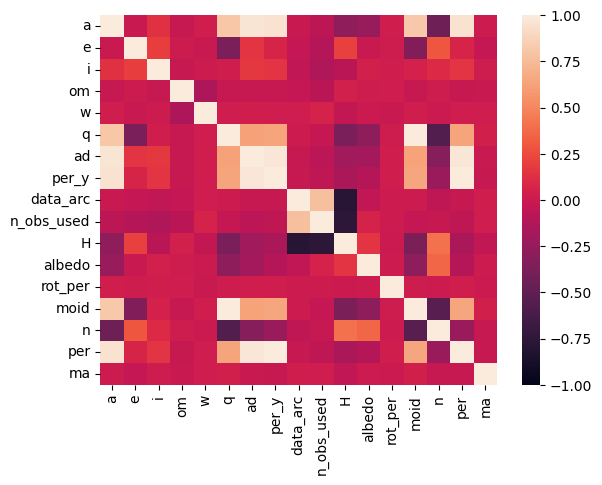

In [4]:
upp_mat = np.triu(df.corr())
sns.heatmap(df.corr(), vmin = -1, vmax = +1, )

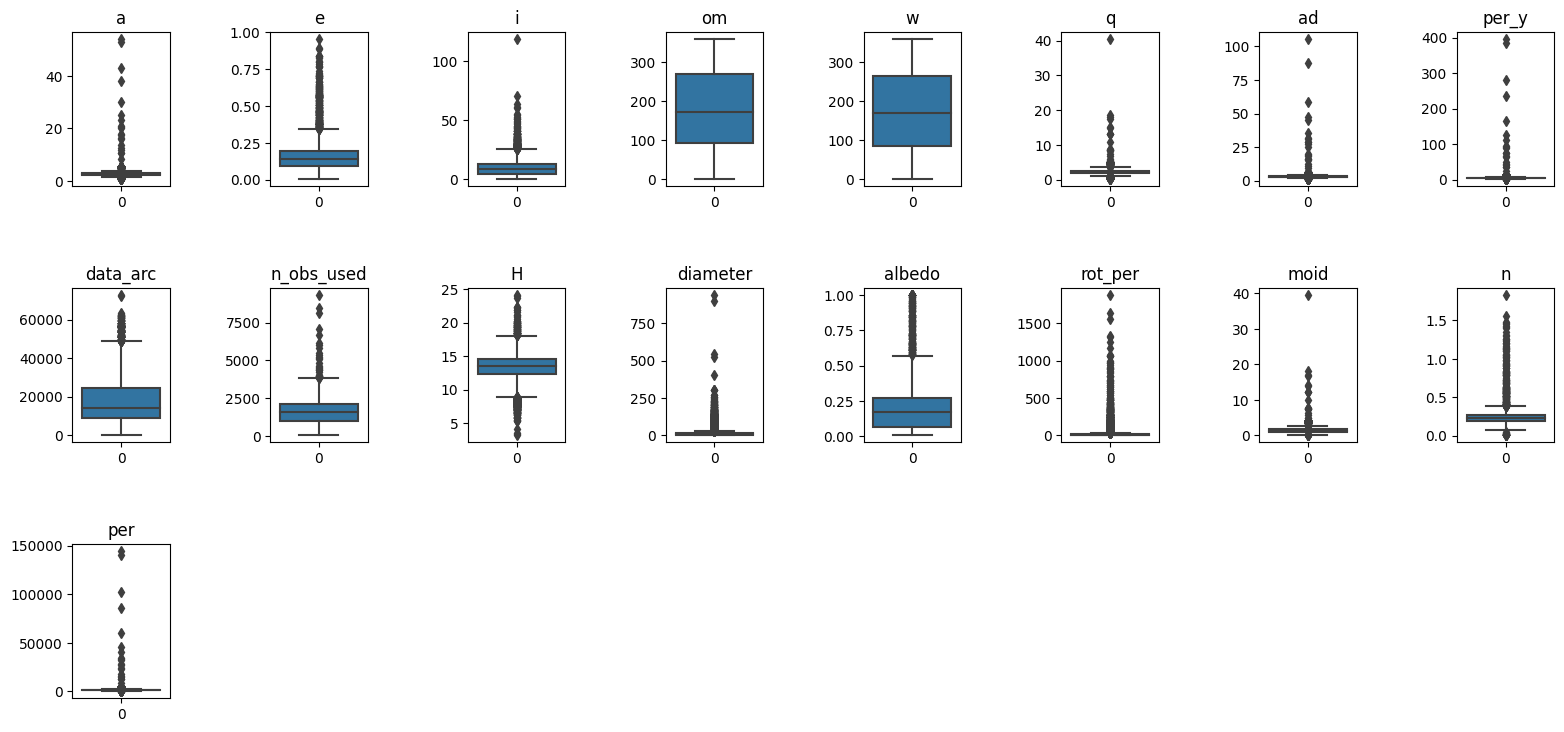

In [5]:
temp=list(df.columns)
a=np.arange(1,int(len(temp)),1)

plt.figure(figsize=(16,10))
for i,j in zip(temp,a):
    plt.subplot(4,8,j)
    sns.boxplot(df[i])
    plt.title(temp[j-1])
    plt.tight_layout(pad=2, h_pad=4, w_pad=4, rect=None)

In [6]:
df["a"] = df["a"].apply(lambda x: 25 if x>25 else x)
df["e"] = df["e"].apply(lambda x: 0.75 if x>0.75 else x)
df["i"] = df["i"].apply(lambda x: 75 if x>75 else x)
df["q"] = df["q"].apply(lambda x: 20 if x>20 else x)
df["ad"] = df["ad"].apply(lambda x: 30 if x>30 else x)
df["per_y"] = df["per_y"].apply(lambda x: 150 if x>150 else x)
df["data_arc"] = df["data_arc"].apply(lambda x: 60000 if x>60000 else x)
df["n_obs_used"] = df["n_obs_used"].apply(lambda x: 7500 if x>7500 else x)
df["H"] = df["H"].apply(lambda x: 23 if x>23 else x)
df["H"] = df["H"].apply(lambda x: 5 if x<5 else x)
df["albedo"] = df["albedo"].apply(lambda x: 0.6 if x>0.6 else x)
df["rot_per"] = df["albedo"].apply(lambda x: 1300 if x>1300 else x)
df["moid"] = df["albedo"].apply(lambda x: 20 if x>20 else x)
df["per"] = df["albedo"].apply(lambda x: 50000 if x>50000 else x)


In [7]:
df["diameter"] = df["diameter"].map(lambda x: float(x))


In [8]:
df.dtypes

a             float64
e             float64
i             float64
om            float64
w             float64
q             float64
ad            float64
per_y         float64
data_arc      float64
n_obs_used      int64
H             float64
diameter      float64
albedo        float64
rot_per       float64
moid          float64
n             float64
per           float64
ma            float64
dtype: object

In [9]:
y=df["diameter"]
X=df.drop("diameter",axis=1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)

In [10]:
scaler = preprocessing.MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
lr.score(X_train,y_train)

0.6384802657130348

In [12]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

9.120469368474158

In [13]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(random_state=200)
DTR.fit(X_train, y_train)
y_pred = DTR.predict(X_test)

DTR.score(X_test, y_test)

0.9242543875287562

In [14]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

2.032433488705629

In [15]:
from sklearn.ensemble import RandomForestRegressor
# 
RFReg= RandomForestRegressor(n_estimators=10)
RFReg.fit(X_train, y_train)
y_pred= RFReg.predict(X_test)

RFReg.score(X_test, y_test)

0.9055514853700181

In [16]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

1.5517184653997849

In [17]:
from xgboost import XGBRegressor

XGBReg = XGBRegressor()
eval_set=[(X_test,y_test)]

XGBReg.fit(X_train, y_train, eval_set=eval_set, early_stopping_rounds=1000, verbose=0)
y_pred = XGBReg.predict(X_test)
XGBReg.score(X_test, y_test)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


0.9363736715642417

In [18]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

1.4527414142804982

In [19]:
df.drop("diameter",axis=1).head()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,albedo,rot_per,moid,n,per,ma
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,1002,5.00,0.0900,0.0900,0.0900,0.213885,0.0900,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,60000.0,7500,5.00,0.1010,0.1010,0.1010,0.213503,0.1010,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,60000.0,7104,5.33,0.2140,0.2140,0.2140,0.226019,0.2140,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,7500,5.00,0.4228,0.4228,0.4228,0.271609,0.4228,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,60000.0,2916,6.85,0.2740,0.2740,0.2740,0.238632,0.2740,282.366289


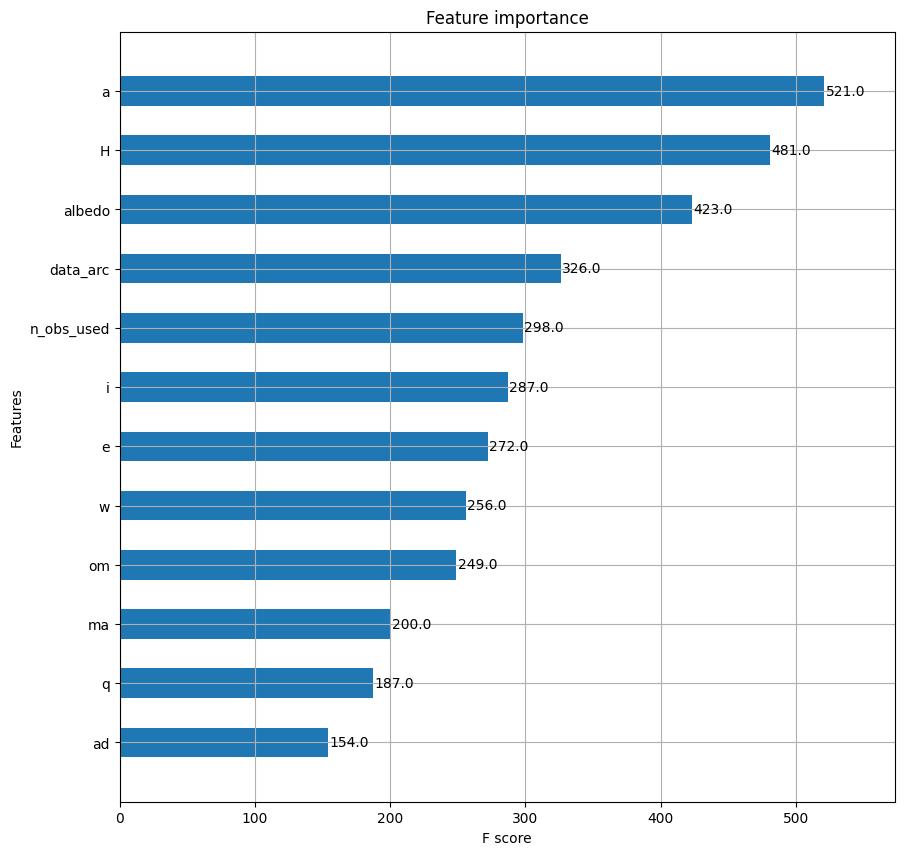

In [20]:
import xgboost as xgb
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(XGBReg, height=0.5, ax=ax, importance_type='weight')
plt.show()